In [582]:
import numpy as np                   # import numpy package under shorthand "np"
import pandas as pd                  # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt
import seaborn as sns
# Regression import 

%config Completer.use_jedi = False  # enable code auto-completion

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import sklearn

In [583]:
# Read data
rawdata = pd.read_csv("stroke.csv")
# Show data examples
rawdata.sample(10)
len(rawdata[rawdata["stroke"]==1])

249

In [584]:
#Delete NaN data
rawdata=rawdata.dropna(axis=0)
#Delete rows where "smoking_status" is Unknown
rawdata=rawdata[rawdata["smoking_status"] != "Unknown"]
rawdata=rawdata[rawdata["gender"] != "Other"]

In [585]:
condition = (rawdata["stroke"]==0)
num_samples = len(rawdata[rawdata["stroke"]==1])  # Change to the desired number of random samples
rng = np.random.default_rng(seed=44)
random_indices = rng.choice(rawdata[condition].index, size = num_samples)


In [586]:
#random_indices = np.random.choice(rawdata[condition].index, num_samples, replace=False)
random_indices

array([3490,  821, 4248, 1479, 3485, 2206,  666, 4952, 2839, 1005, 5069,
       4438,  338, 1015,  724, 1878, 2195, 3542, 3822, 3239, 2385, 4887,
       2064, 2233, 2189, 4810, 5036, 4752, 3085, 3725, 2234,  345, 3118,
       4144,  759, 4638, 2885, 2780, 4423, 1176, 4950, 1092, 3860, 4376,
       3426,  661, 3603, 2901, 5057, 1204, 1294, 1689, 4343, 4991, 4947,
       1571, 3716, 3568, 1770, 3997, 3444, 1630, 1905,  929, 2181, 4017,
       3088, 2444, 4326, 1628, 1129, 1247, 2362, 5019, 2931, 3394, 4358,
       2777, 3017,  784, 1657, 4691, 3856, 1853, 3159, 4114,  505, 4661,
       1553, 1216, 4648, 4996, 1030, 4608, 2910, 2990, 2534, 3771, 3123,
       1575,  855, 3767, 2005, 2328, 4942, 1813,  675, 3631, 4199, 2102,
       4480, 3668, 1334, 4412, 2723, 1542, 3524, 1221, 1898, 1786, 1323,
       2292, 5036, 3791, 3456, 2360, 3388, 3612, 1088, 5080,  969, 1354,
       2098, 3954,  972, 2559, 4739, 2265, 4556, 3172, 4190,  800, 2160,
       1760, 2251, 1557, 2130, 3210, 2520, 1320, 14

In [587]:

#random_indices = np.random.choice(rawdata[condition].index, num_samples, replace=False, random_indices)
selected_rows_0 = rawdata.loc[random_indices]
selected_rows_1 = rawdata[rawdata["stroke"]==1]

print(len(selected_rows_0))
print(len(selected_rows_1))

180
180


In [588]:
len(rawdata[rawdata["stroke"]==1])
rawdata = pd.concat([selected_rows_0, selected_rows_1], ignore_index=True)
rawdata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,17745,Male,79.0,1,0,Yes,Self-employed,Urban,84.88,28.7,formerly smoked,0
1,25458,Female,70.0,1,0,Yes,Govt_job,Rural,88.66,36.7,formerly smoked,0
2,15422,Male,31.0,0,0,No,Govt_job,Rural,80.57,28.2,formerly smoked,0
3,43059,Female,71.0,0,0,Yes,Self-employed,Rural,151.30,26.3,never smoked,0
4,33960,Male,39.0,1,0,Yes,Self-employed,Urban,71.66,28.7,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,10548,Male,66.0,0,0,Yes,Private,Rural,76.46,21.2,formerly smoked,1
356,52282,Male,57.0,0,0,Yes,Private,Rural,197.28,34.5,formerly smoked,1
357,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1
358,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1


**After examining the dataset, we think some preliminary processing should be done**
1. In this report, only man and woman(physically) will be discussed, so the rows contain "Other" value will be excludes 
2. In addition, there is "Unknown" category in smoking status which is not suitable for trainning. Rows containing "Unknown" smoking status will be excluded as well.

In [589]:
# Create 2 copied of dataset
# visual_data: used for visualization
# model_data: used for training and testing
visual_data = rawdata.copy(deep=True)
model_data = rawdata.copy(deep=True)

In [590]:
rawdata.shape

(360, 12)

**This block turns all the categorical features into numeric values instead of texts (only work for `model_data`)**

In [591]:
map_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
gender_map = {"Female": 0, "Male": 1}
married_map = {"No": 0, "Yes": 1}
work_map = {"Never_worked": 0, "Private": 1, "Govt_job" : 2, "children" : 3, "Self-employed" : 4}
residence_map = {"Rural": 0, "Urban": 1}
smoking_map = {"never smoked": 0, "formerly smoked": 1, "smokes" : 2}

maps = [gender_map, married_map, work_map, residence_map, smoking_map]


for label, m in zip(map_columns, maps):
    diago = model_data[label].copy(deep=True)
    diago = diago.map(m).copy(deep=True)
    model_data[label] = diago.copy(deep=True)
    
model_data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
107,46903,0,62.0,0,0,1,1,1,56.74,28.9,0,0
189,12175,0,54.0,0,0,1,1,1,104.51,27.3,2,1
226,65842,0,67.0,1,0,1,4,0,61.94,25.3,2,1
331,33943,0,39.0,0,0,1,1,1,83.24,26.3,0,1
206,712,0,82.0,1,1,0,1,0,84.03,26.5,1,1


In [592]:
model_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,37204.183333,0.422222,57.455556,0.213889,0.133333,0.808333,1.950000,0.527778,120.478194,30.235278,0.747222,0.500000
std,21466.126112,0.494601,19.172817,0.410620,0.340408,0.394160,1.298274,0.499923,56.441852,6.986254,0.810786,0.500696
min,156.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,56.110000,16.400000,0.000000,0.000000
25%,19083.750000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,78.890000,25.375000,0.000000,0.000000
50%,36729.500000,0.000000,60.000000,0.000000,0.000000,1.000000,1.000000,1.000000,97.555000,29.000000,1.000000,0.500000
75%,56576.750000,1.000000,74.000000,0.000000,0.000000,1.000000,4.000000,1.000000,157.497500,33.700000,1.000000,1.000000
max,72594.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,57.700000,2.000000,1.000000


In [593]:
# preprocessing2: Data visualization and analysis
# Seperate columns into categorical(discrete) and numerical(continuous)
# All features: 'gender', 'age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin'
categoric_columns = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

**This block shows**
1. the relationship between stroke and all categorical features respectively
2. the distribution of all categorical features 
3. the count plot of stroke

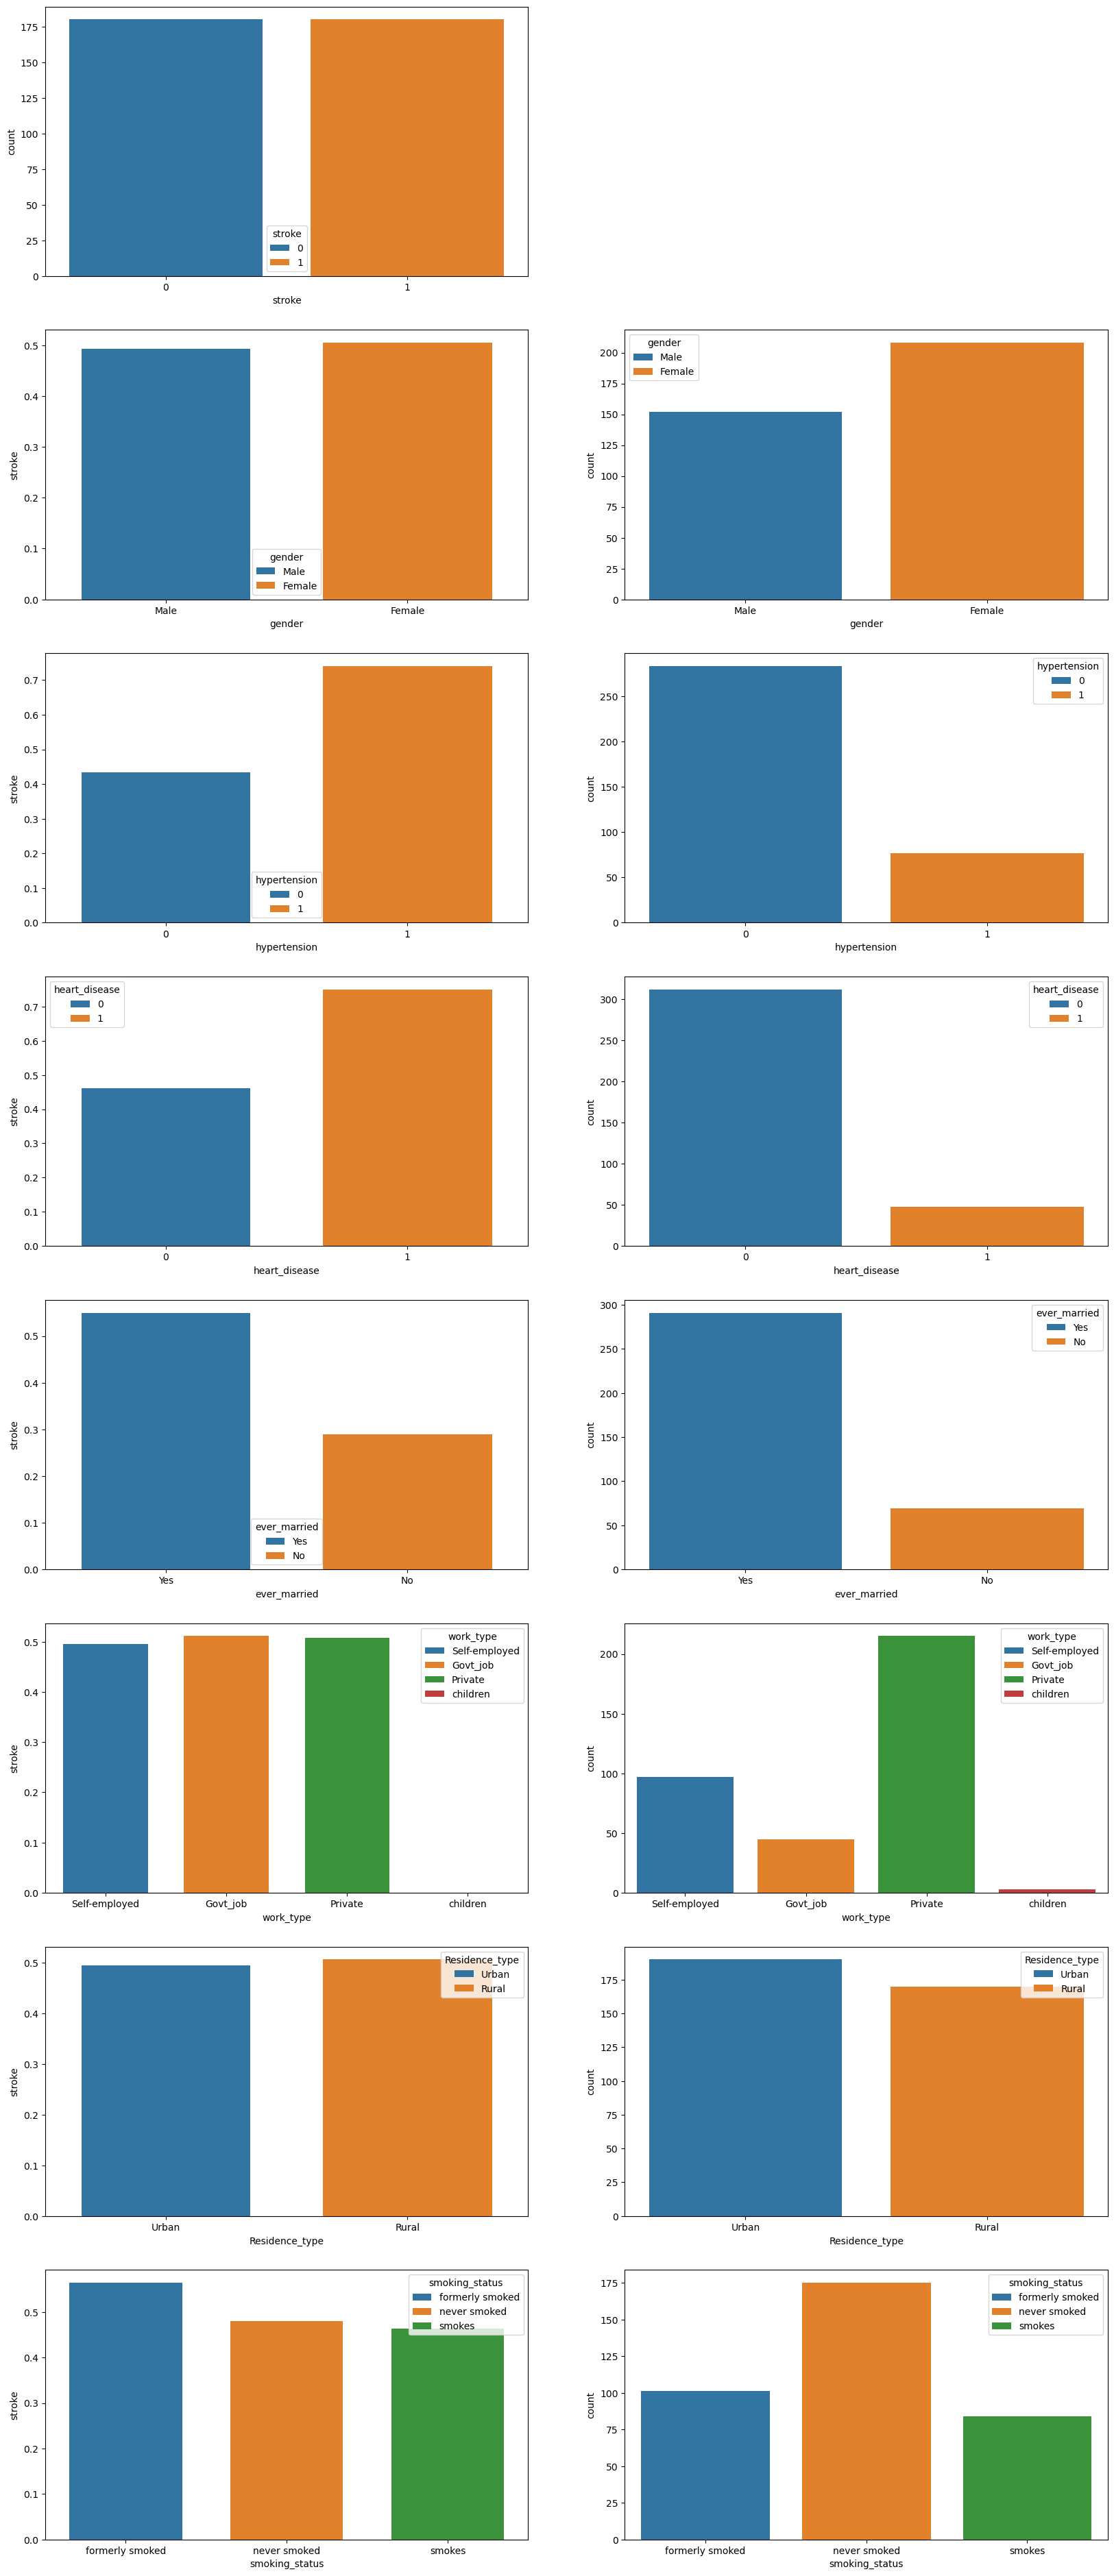

In [594]:
# Gender(the only categorical feature)
fig, axes = plt.subplots(8, 2, figsize=(20, 48))
# Stroke count
sns.countplot(data=visual_data, x='stroke', ax=axes[0][0], hue="stroke", dodge=False)
axes[0][1].axis('off')

for i, c in enumerate(categoric_columns):
    # Gender vs Class
    sns.barplot(x=c, y="stroke", data=visual_data, width=0.7, errorbar=None, hue=c, dodge=False, ax=axes[i+1][0])
    # Gender count
    sns.countplot(data=visual_data, x=c, ax=axes[i+1][1], hue=c, dodge=False)
    

plt.show()

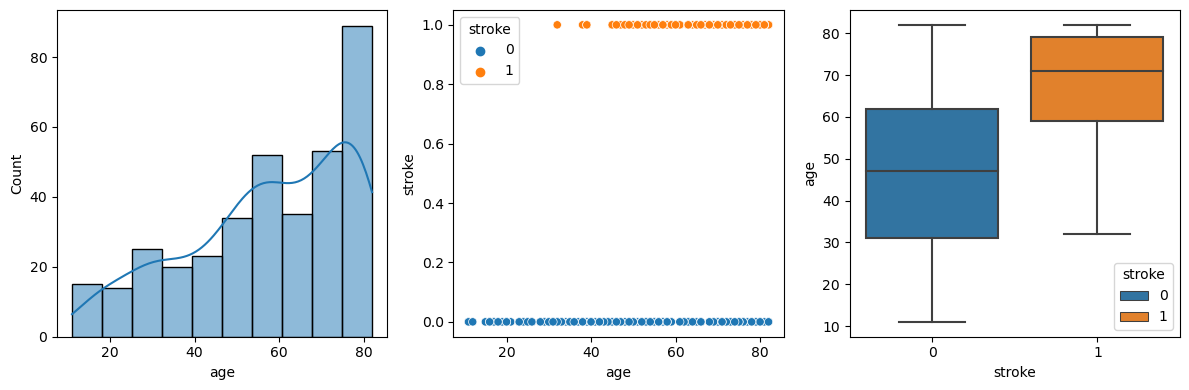

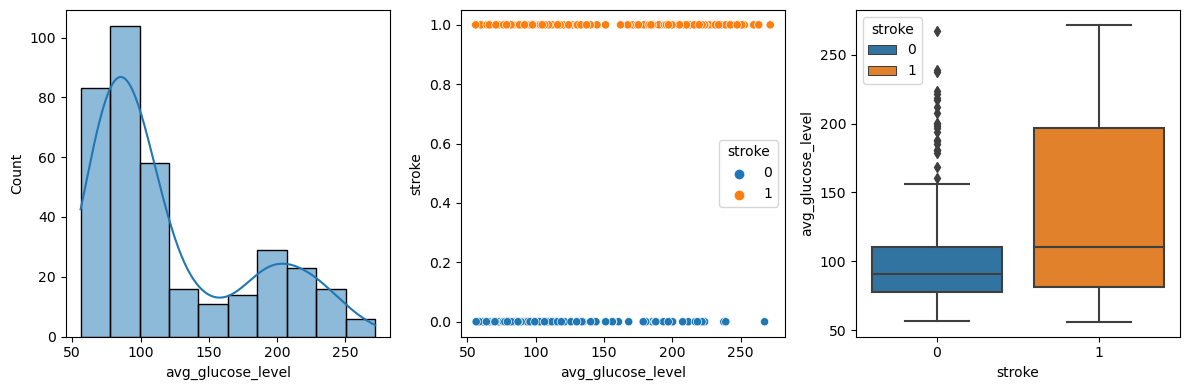

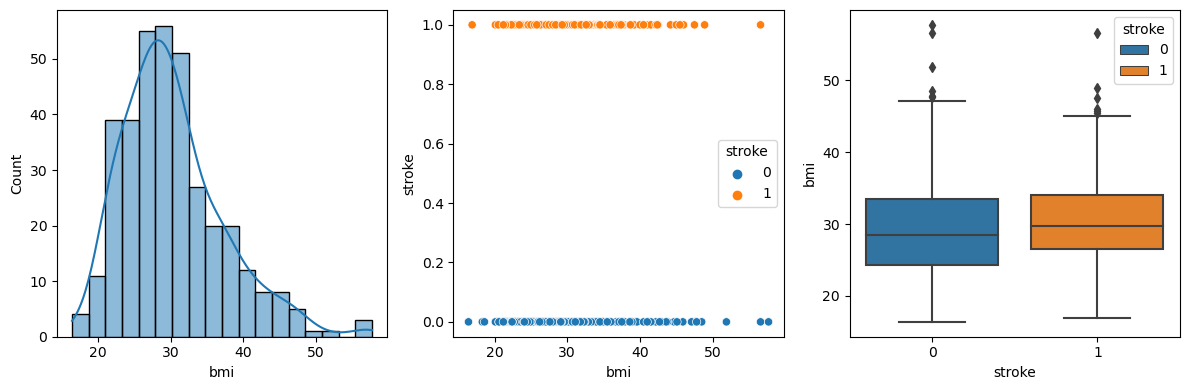

In [595]:
# numeric data visualization
for index, label in enumerate(numeric_columns):
    fig, axes = plt.subplots(1, 3, figsize=(12,4))
    # distribution
    sns.histplot(data=visual_data, x=label, ax=axes[0], kde=True)
    # "label" VS class
    sns.scatterplot(data=visual_data, x=label, y="stroke", ax=axes[1], hue="stroke")
    # boxplot 
    sns.boxplot(data=visual_data, x='stroke', y=label, ax=axes[2], hue="stroke", dodge=False)
    # Adjusting the layout for better visualization
    plt.tight_layout()
    plt.show()

**According to the plots，there is not extreme data in sight but some peripheral element. They will be ruled out by the code block below**

Outlier detection In a relatively small dataset of more than samples, outliers can have a more significant impact on statistical analyses or machine learning models compared to larger datasets.

When we examine the boxplots, we can see that there are some outlier values, although not too many. We will clean these in the next step using IQR(Interquartile Range) method

In [596]:
for i in numeric_columns:
    Q1 = model_data[i].quantile(0.25)
    Q3 = model_data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'Original shape: {model_data.shape}')
    model_data = model_data[(model_data[i] >= lower_bound) & (model_data[i] <= upper_bound)]
    print(f'Current shape: {model_data.shape}')
    print()
visual_data = model_data.copy(deep=True)

Original shape: (360, 12)
Current shape: (360, 12)

Original shape: (360, 12)
Current shape: (360, 12)

Original shape: (360, 12)
Current shape: (350, 12)



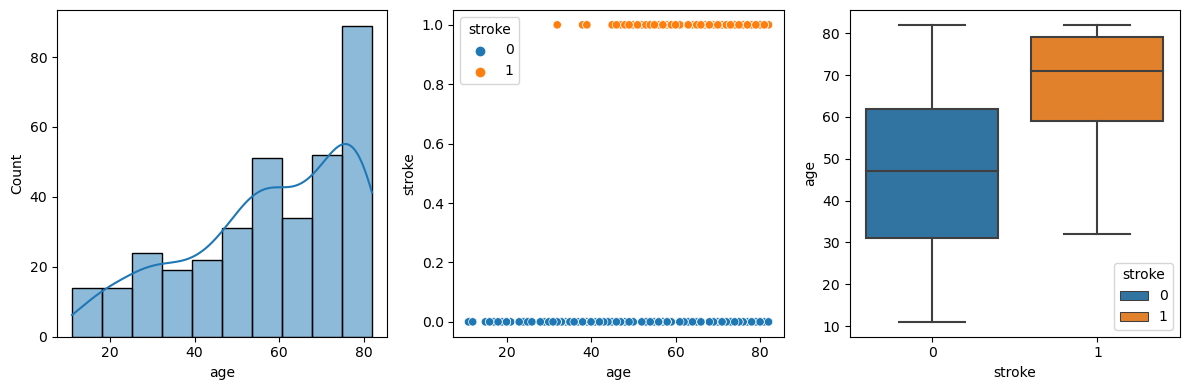

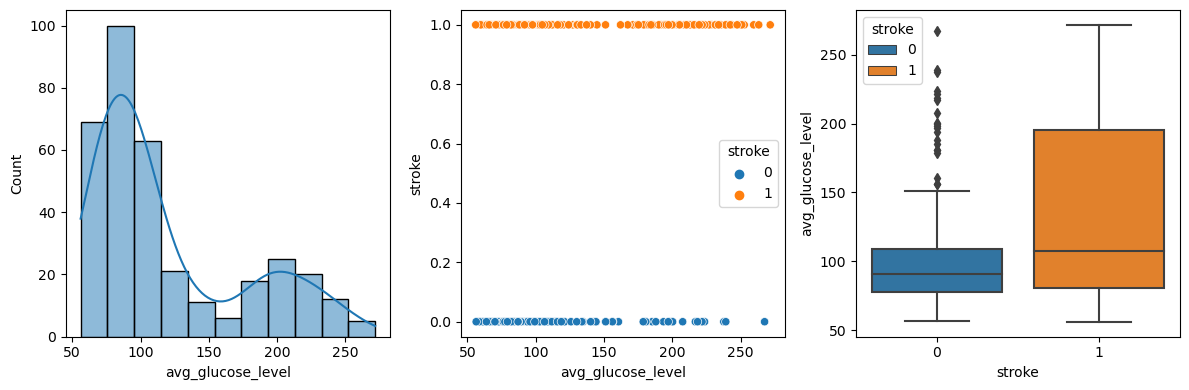

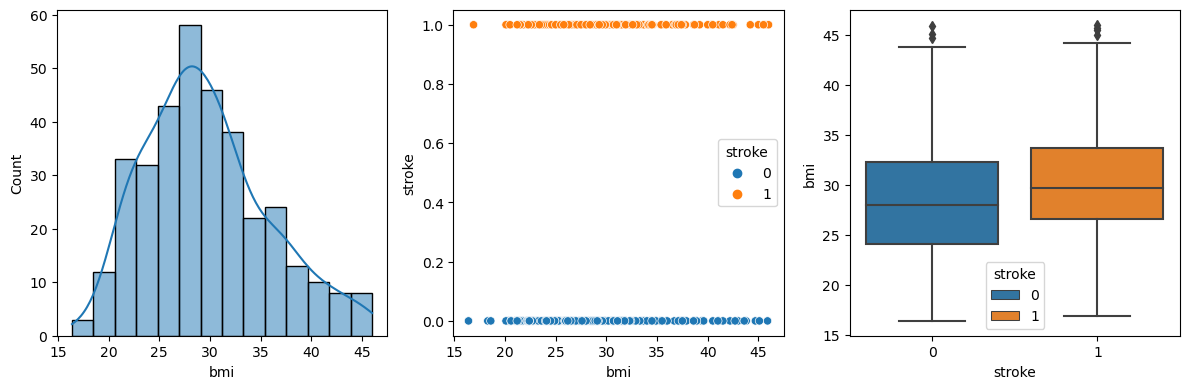

In [597]:
# numeric data visualization
for index, label in enumerate(numeric_columns):
    fig, axes = plt.subplots(1, 3, figsize=(12,4))
    # distribution
    sns.histplot(data=visual_data, x=label, ax=axes[0], kde=True)
    # "label" VS class
    sns.scatterplot(data=visual_data, x=label, y="stroke", ax=axes[1], hue="stroke")
    # boxplot 
    sns.boxplot(data=visual_data, x='stroke', y=label, ax=axes[2], hue="stroke", dodge=False)
    # Adjusting the layout for better visualization
    plt.tight_layout()
    plt.show()

**Feature selection**: According to the plots, `residence_type` does not contribute much to the occurrence of stroke, so it will be excluded from the dataset
**Final features**: `gender, age, hypertension, heart_disease, ever_married, work_type, avg_glucose_level, bmi, smoking_status`

In [598]:
# If you need to drop any other columns, just add it in the [] below
X = model_data.drop(["stroke", "Residence_type", "id"], axis = 1)

y = model_data["stroke"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
#80% train, 10% testing, 10%validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print('Shape of X_Train set : {}'.format(X_train.shape))
print('Shape of y_Train set : {}'.format(y_train.shape))
print('_'*50)
print('Shape of X_test set : {}'.format(X_test.shape))
print('Shape of y_test set : {}'.format(y_test.shape))
print('_'*50)
print('Shape of X_val set : {}'.format(X_val.shape))
print('Shape of y_val set : {}'.format(y_val.shape))


Shape of X_Train set : (280, 9)
Shape of y_Train set : (280,)
__________________________________________________
Shape of X_test set : (35, 9)
Shape of y_test set : (35,)
__________________________________________________
Shape of X_val set : (35, 9)
Shape of y_val set : (35,)


In [599]:
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(c_mat, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)


In [600]:
# Find best parameters for DTs

criterions = ['gini', 'entropy']
best_criterion = str()
splitters = ['best', 'random']
best_splitter = str()
max_depthes = [None, 3, 4, 5, 6, 7, 8, 9]
best_depth = int()
best_acc = 0
best_recall = 0

for criterion in criterions:
    for splitter in splitters:
        for depth in max_depthes:
            # Modeling
            DTs = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=depth, random_state=0)
            DTs.fit(X_train, y_train)
            y_pred = DTs.predict(X_val)
            # Score
            score = accuracy_score(y_val, y_pred)
            # Recall
            recall = recall_score(y_val, y_pred)
            if (recall > best_recall):
                best_recall = recall
            # Condition to find best parameters
            if (score > best_acc) and (score < 0.98):
                best_acc = score
                best_criterion = criterion
                best_splitter = splitter
                best_depth = depth
            else:
                continue
                
print('Best criterion : ', best_criterion)
print('Best splitter : ', best_splitter)
print('Best depth : ', best_depth)
print('Accuracy Score : ', best_acc)
print("Recall: ", best_recall)
#tree.plot_tree(DTs)

Best criterion :  gini
Best splitter :  best
Best depth :  None
Accuracy Score :  0.8
Recall:  0.9411764705882353


In [601]:
print(f"Using criterion: {best_criterion}, spliter: {best_splitter}, depth: {best_depth}.")
DTs = tree.DecisionTreeClassifier(criterion=best_criterion, splitter=best_splitter, max_depth=best_depth, random_state=0)
DTs.fit(X_train, y_train)
y_pred = DTs.predict(X_test)
accuracy_score(y_test, y_pred)

print(f"recall: {recall_score(y_test, y_pred)}")
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

Using criterion: gini, spliter: best, depth: None.
recall: 0.7058823529411765
accuracy: 0.6857142857142857


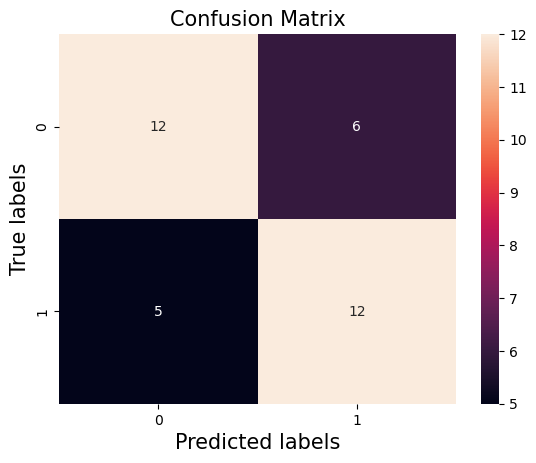

In [602]:
generate_confusion_matrix(y_test, y_pred)

In [603]:
n_estimators = [10, 50, 100, 250, 500]
criterions = ['gini', 'entropy']
max_depthes = [None, 2,  4, 6, 8]
best_acc = 0

for estimator in n_estimators:
    for criterion in criterions:
        for depth in max_depthes:
            # Modeling
            RF = RandomForestClassifier(n_estimators=estimator, criterion=criterion, 
                                        max_depth=depth, n_jobs=-1)
            RF.fit(X_train, y_train)
            y_pred = RF.predict(X_val)
            # Score
            score = accuracy_score(y_val, y_pred)
            # Condition to find best parameters
            if (score > best_acc) and (score < 0.98): # Condition to avoide overfitting
                best_acc = score
                best_estimator = estimator
                best_criterion = criterion
                best_depth = depth

print('Best Criterion : ', best_criterion)
print('Best estimator : ', best_estimator)
print('Best depth : ', best_depth)
print('Accuracy Score : ', best_acc)

Best Criterion :  gini
Best estimator :  50
Best depth :  None
Accuracy Score :  0.8


In [604]:
print(f"Using criterion: {best_criterion}, estimator: {best_estimator}, depth: {best_depth}.")
RF = RandomForestClassifier(n_estimators=best_estimator, criterion=best_criterion, max_depth=best_depth, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
#recall_score(y_test, y_pred)

Using criterion: gini, estimator: 50, depth: None.
recall: 0.7647058823529411
accuracy: 0.7714285714285715


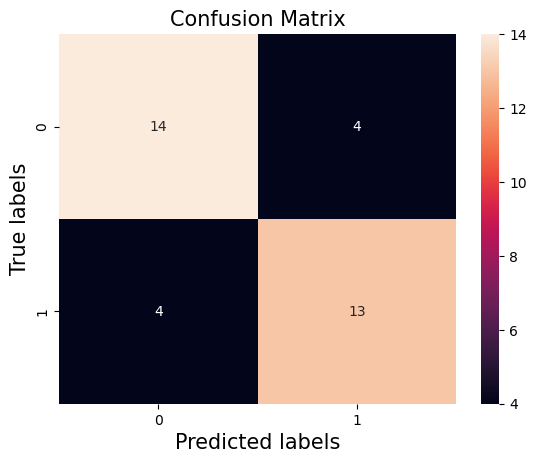

In [605]:
generate_confusion_matrix(y_test, y_pred)

In [606]:
# Find best parameters for KNN
best_acc = 0

for k in range(3, 15, 1) :
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    if score > best_acc :
        best_acc = score
        best_k = k
print('Best k :', best_k)
print('score : ', best_acc)

Best k : 13
score :  0.7714285714285715


In [607]:
print(f"Using k: {best_k}")
KNN = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

Using k: 13
recall: 0.7647058823529411
accuracy: 0.7714285714285715


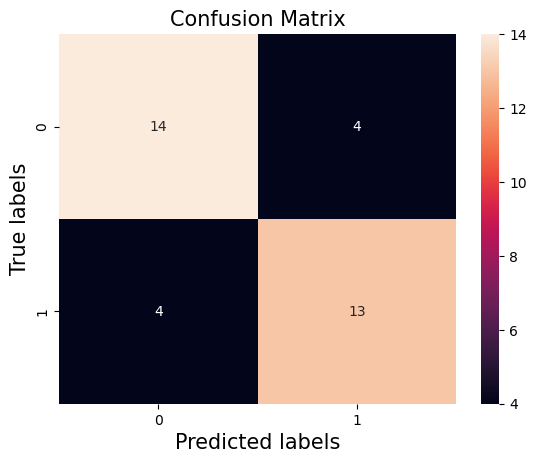

In [608]:
generate_confusion_matrix(y_test, y_pred)